# Student Performance Data Analysis

## Ryota Nishida

In [1]:

import seaborn as sns
sns.set(style='whitegrid', font_scale=2)
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Section 1 - Introduction

In this file, there are two files called `StudentsPerformance_info.csv` and `StudentsPerformance_scores.csv`

##  Data Description:

- There are 1000 students that attended a paid workshop to improve their standardized test results.
- Each student has some demographic information, as well as some test scores. 
- Here is the description of each column in the two files:

- File 1:`StudentsPerformance_info.csv`
    - Personal ID: This is a column with personal IDs representing individuals. This column exists in both files.
    - race/ethnicity: anonymized to remove the information, but grouped into categories.
    - parental level of education: the highest level of education parents of the student completed (highest is chosen of both parents).
    - lunch: This is a column that is a surrogate for socioeconomic status. "standard" means these students paid their way, "free/reduced" means that the students requested a subsidy/bursary to cover costs.
    - test preparation course: students that completed a test-preparation score get "completed" and those that didn't get "none".

    
- File 2: `StudentsPerformance_scores.csv`
    - Personal ID: This is a column with personal IDs representing individuals. This column exists in both files.
    - math score: score on the math standardized test (out of 100).
    - reading score: score on the reading standardized test (out of 100).
    - writing score: score on the writing standardized test (out of 100). 

## 1.1 - Loading the data 

In [2]:

df=pd.read_csv('data/StudentsPerformance_info.csv')
df1=pd.read_csv('data/StudentsPerformance_scores.csv')

df_1=df1.drop('Personal ID', 1)



df3 = pd.concat([df, df_1], axis=1)

df3



/var/folders/v0/_wwqjd8d687868b84367kq2w0000gn/T/ipykernel_83619/428898799.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_1=df1.drop('Personal ID', 1)


,Personal ID,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,500,group B,bachelor's degree,standard,none,72,72,74
1,501,group C,some college,standard,completed,69,90,88
2,502,group B,master's degree,standard,none,90,95,93
3,503,group A,associate's degree,free/reduced,none,47,57,44
4,504,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,1495,group E,master's degree,standard,completed,88,99,95
996,1496,group C,high school,free/reduced,none,62,55,55
997,1497,group C,high school,free/reduced,completed,59,71,65
998,1498,group D,some college,standard,completed,68,78,77


## 1.2 - Cleaning the data 

This is in order to visualize the data easier.

I will replace the "Parental level of Education" column as follows:

- "some high school" to: "1-some high school"
- "high school" to: "2-high school"
- "some college" to: "3-some college"
- "associate's degree" to: "4-associate's degree"
- "bachelor's degree" to: "5-bachelor's degree"
- "master's degree" to: "6-master's degree"


In [3]:
df4=df3.replace({'parental level of education' : { "some high school" : "1-some high school", "high school" : "2-high school", "some college" : "3-some college","associate's degree" : "4-associate's degree", "bachelor's degree" : "5-bachelor's degree", "master's degree" : "6-master's degree" }})
df4

df5 = df4 

df5['average test score'] = df5[{'math score','reading score','writing score'}].mean(axis=1)

df5


,Personal ID,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average test score
0,500,group B,5-bachelor's degree,standard,none,72,72,74,72.666667
1,501,group C,3-some college,standard,completed,69,90,88,82.333333
2,502,group B,6-master's degree,standard,none,90,95,93,92.666667
3,503,group A,4-associate's degree,free/reduced,none,47,57,44,49.333333
4,504,group C,3-some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,1495,group E,6-master's degree,standard,completed,88,99,95,94.000000
996,1496,group C,2-high school,free/reduced,none,62,55,55,57.333333
997,1497,group C,2-high school,free/reduced,completed,59,71,65,65.000000
998,1498,group D,3-some college,standard,completed,68,78,77,74.333333


- The first columns seems to showcase identity of indiviuduals.
- The second column seems to show the ethnicity of the individial.
- The third column seems to show the level of education.
- The fourth shows the socioeconomic status.
- The last three seem to just show the grades recieved for different classes for the students.

## 1.3 - Mini Exploratory Data Analysis 

In [4]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
Personal ID,1000.0,999.500000,288.819436,500.0,749.750000,999.500000,1249.250000,1499.0
math score,1000.0,66.089000,15.163080,0.0,57.000000,66.000000,77.000000,100.0
reading score,1000.0,69.169000,14.600192,17.0,59.000000,70.000000,79.000000,100.0
writing score,1000.0,68.054000,15.195657,10.0,57.750000,69.000000,79.000000,100.0
average test score,1000.0,67.770667,14.257326,9.0,58.333333,68.333333,77.666667,100.0


- The averages of the different test scores seem to all hover around the high 60's. Students seem to do the worst in math, since it has the lowest average. Furthermore, the lowest test scores are seen in math with a minimum of 0.0. Reading has the highest average, so students seem to perform best in reading.

In [5]:
df4.isnull().sum()

Personal ID                    0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average test score             0
dtype: int64

- It seems that there are no null values within any of the columns. This is a good sign as it means that there are no missing values within the dataset.

In [6]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Personal ID                  1000 non-null   int64  
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   average test score           1000 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


- All the columns with integers seem to have the right data types. The object data type also seem to be correct.

In [7]:
df4.shape

(1000, 9)

- There are 1000 rows and 8 columns in the dataset. The 1000 rows means that there about 1000 personal id's meaning that there is a sample size of the 1000 individiuals. This is good because it will give better more accurate results in anaylysis.

In [8]:
df4['math score'].nunique()

81

In [9]:
df4['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

- Within the math column there seems to be 81 unique scores ranging from 0 all the way to 100. This continues to show that math test scores have the widest range of scores. 

In [10]:
df5.groupby(['race/ethnicity'])['average test score'].mean()

race/ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: average test score, dtype: float64

- The highest average scores seem to come from ethnic group E, and the lowest scores seem to come from ethnic group A. This could be an indicator that ethnic group E have some academic advantage. Such as maybe access to better schools or better learning resources.

In [11]:
df4.groupby(['test preparation course'])[['math score','reading score', 'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


- Children that complete a test preparation course seem to do better compared to those that don't.The reading and writing scores are above 70 percent for children who completed a test preparation course. Those that didn't complete a test preparation course have scores in the low 60's. This suggests that having access to test preparation courses can significantly boost grades. Also indicating that these courses are effective.

In [12]:
ethnicity=df4.groupby(['race/ethnicity'])[['Personal ID']].count()

ethnicity

,Personal ID
race/ethnicity,
group A,89
group B,190
group C,319
group D,262
group E,140


- This shows that there are 89 individuals from ethnic group A, 190 from B,319 from C, 262 from D, and 140 from E.
  From the above table it seems that group C is the majority group, and group A is the minority.

[Text(0, 0, 'group B'),
 Text(1, 0, 'group C'),
 Text(2, 0, 'group A'),
 Text(3, 0, 'group D'),
 Text(4, 0, 'group E')]

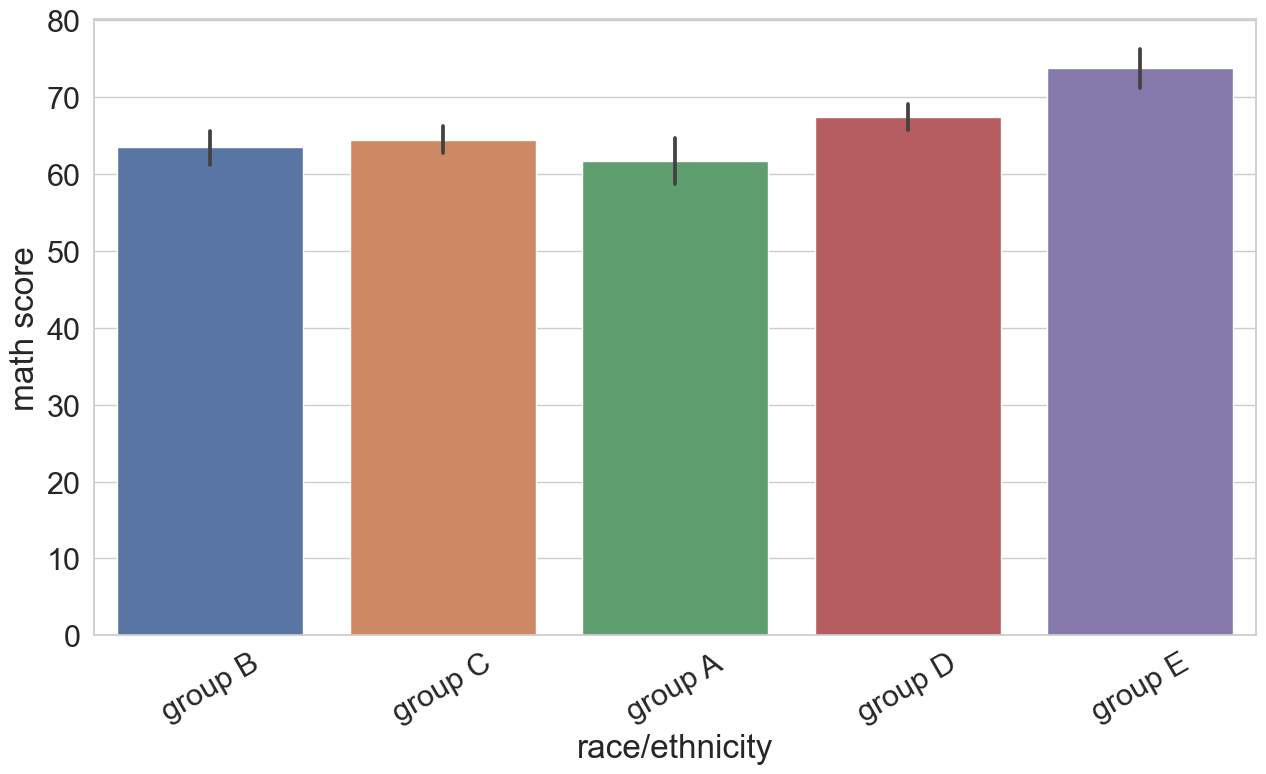

In [13]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x = 'race/ethnicity', y = 'math score',data = df4)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)




- As can be seen above, it seems that children from the ethnic group E seem to have the highest math test scores and  children from group A have the lowest math test scores. This might show that ethnicity plays a role in test scores.This can be understood by looking at the different lengths of the different bars in relation to math scores.

[Text(0, 0, "5-bachelor's degree"),
 Text(1, 0, '3-some college'),
 Text(2, 0, "6-master's degree"),
 Text(3, 0, "4-associate's degree"),
 Text(4, 0, '2-high school'),
 Text(5, 0, '1-some high school')]

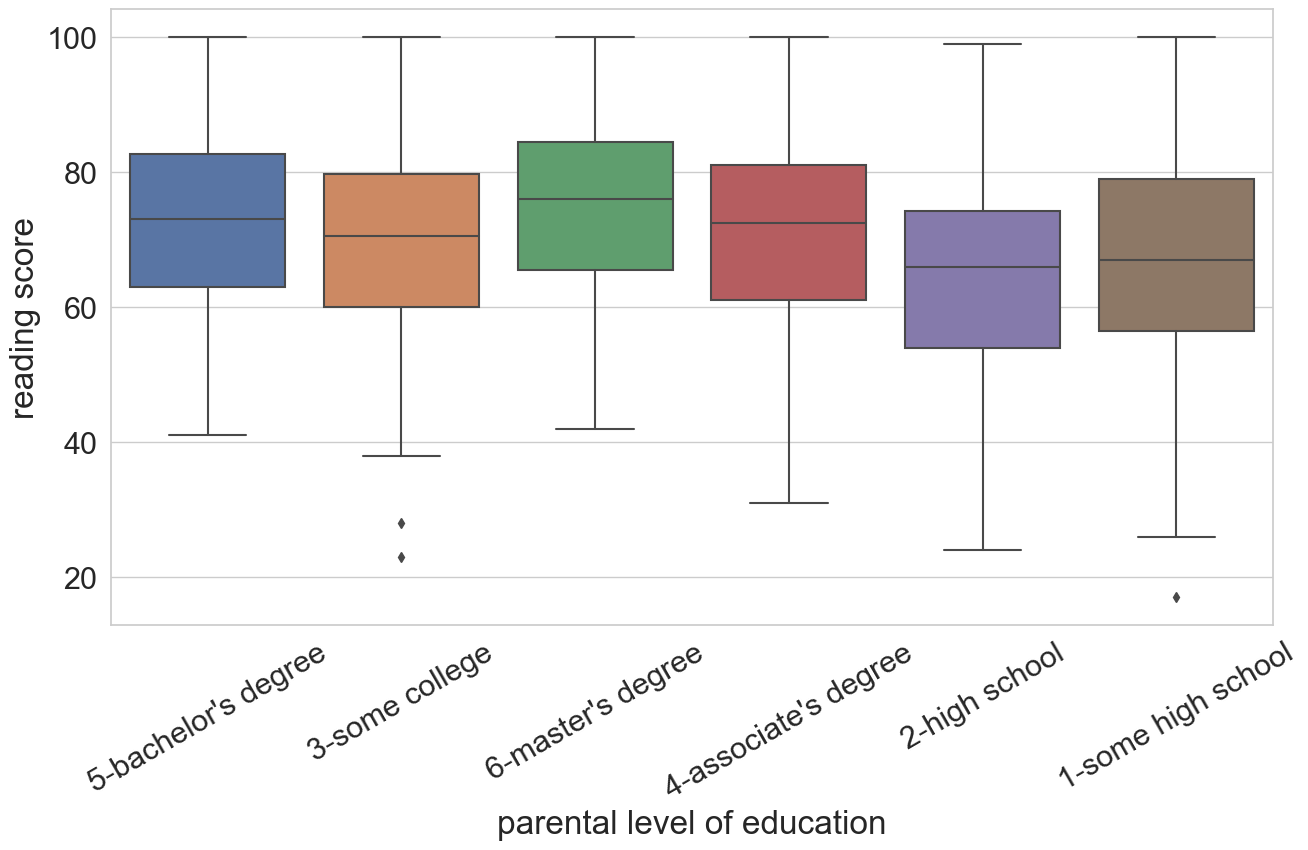

In [14]:

plt.figure(figsize = (15,8))
ax = sns.boxplot(x = 'parental level of education', y = 'reading score',data = df4)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

- This shows that students who's parents have a masters have the highest average reading scores, and students who's parents have had only a high school level education (whether some or alot) have the lowest average reading scores. This suggests that literacy and test scores have a positive correlation with the level of the education achieved by the parents.

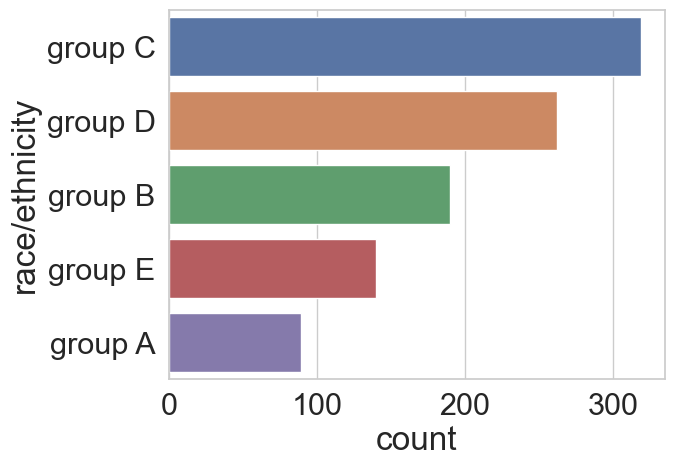

In [15]:
 ax = sns.countplot(y="race/ethnicity", data=df4,order = df4['race/ethnicity'].value_counts().index)


- The above graph is a visual representation of the number of individuals who come from each ethnic group. Since ethnic group C has the longest bin, it means that they have the highest number of individuals. Then comes D,B,E, and then A which has the least number of individuals. This means that a majority of the students in the data set are from group C, and a minority of students come from group A.

# 2 - Research questions 

## 2.2 - How does the parental level of education correspond to the students' average math, writing, and reading scores?

### 2.2.1 - Visualization

In [16]:
df5 


,Personal ID,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average test score
0,500,group B,5-bachelor's degree,standard,none,72,72,74,72.666667
1,501,group C,3-some college,standard,completed,69,90,88,82.333333
2,502,group B,6-master's degree,standard,none,90,95,93,92.666667
3,503,group A,4-associate's degree,free/reduced,none,47,57,44,49.333333
4,504,group C,3-some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,1495,group E,6-master's degree,standard,completed,88,99,95,94.000000
996,1496,group C,2-high school,free/reduced,none,62,55,55,57.333333
997,1497,group C,2-high school,free/reduced,completed,59,71,65,65.000000
998,1498,group D,3-some college,standard,completed,68,78,77,74.333333


[Text(0, 0, "5-bachelor's degree"),
 Text(1, 0, '3-some college'),
 Text(2, 0, "6-master's degree"),
 Text(3, 0, "4-associate's degree"),
 Text(4, 0, '2-high school'),
 Text(5, 0, '1-some high school')]

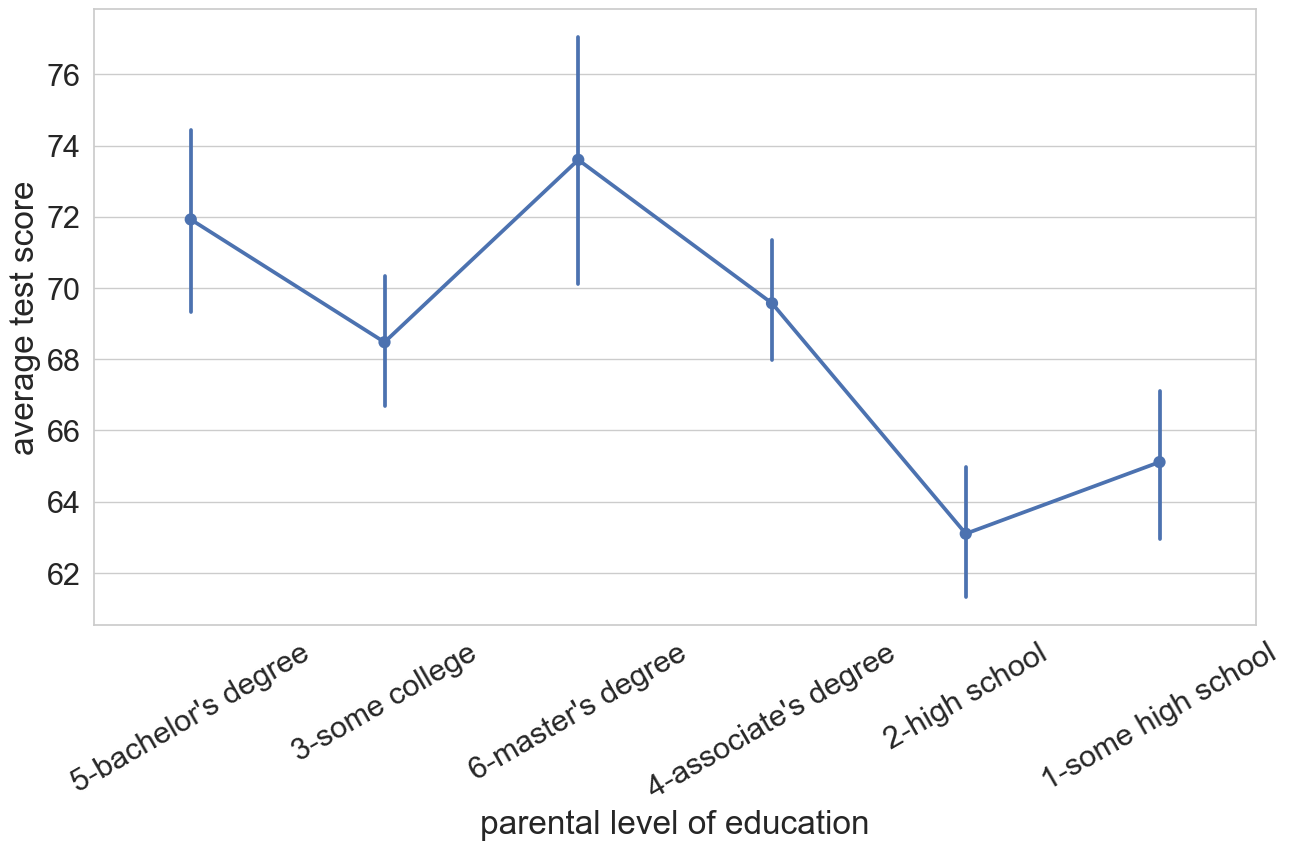

In [17]:
plt.figure(figsize = (15,8))
ax = sns.pointplot(x = 'parental level of education', y = 'average test score',data = df5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

### 2.2.2 - Describing the Visualization  

- As can be seen in the point plot above, the average test score value is highest for students with parents with the most education. As education level of parents increases, so do the respective grades of their students. The error bars showcase the dispersion of test score values below and above the mean average test score for each level of parental education. Average test scores for students with parents who have masters, have the largest dispersion from the mean, which suggests more uncertainty with regards to the average test score in that category.

### 2.2.3 - Answering the research question 

- Overall, there seems to be a positve linear relationship between parental level of education and average test scores for students. This means students who come from educated families are more likely to perform better in school. This may be because parents with high levels of education, value academics more than other parents and therefore push their kids towards academics alot more.

In [18]:
subject=['math score','reading score','writing score']
grouped=df4.groupby(['parental level of education'])[subject].mean()

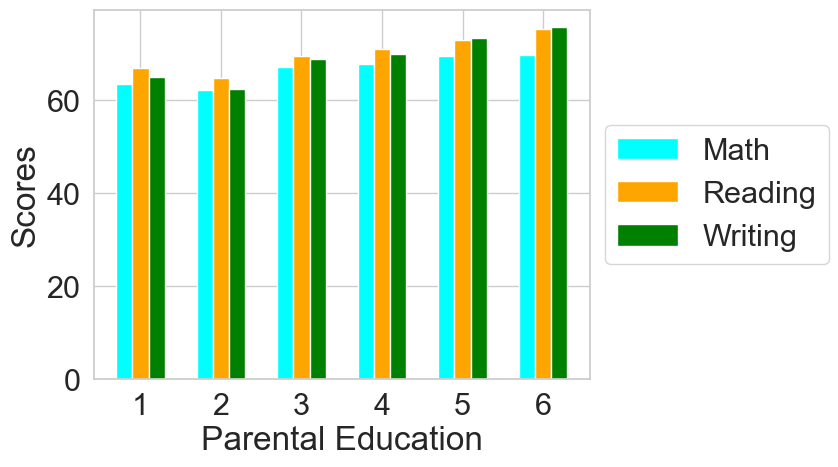

In [19]:

x = np.arange(6)
y1 = grouped['math score']
y2 = grouped['reading score']
y3 = grouped['writing score']
width = 0.2
  

plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['1', '2', '3', '4', '5','6'])
plt.xlabel("Parental Education")
plt.ylabel("Scores")
plt.legend(["Math", "Reading", "Writing"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- The above graph showcases the average math, reading, and writing scores for children who come from parents with different levels of education. The parental education level is represented by values of 1 to 6. 1 being the lowest education level(some highschool) and 6 being the highest(master's degree).

- The graph above also shows that test scores across all three subject areas increase for children, as the level of parental education increases. Children seem to perform the best at reading compared to the other subjects, this applies for all levels of parental education. However, children who's parents have bachelors and master degrees seem to do better at writing than reading, if not performing equally in both subjects.



## 2.3 - How does socio-economic status impact the combined average test scores of children?


## 2.3.1 - Visualization 

In [20]:
df4.groupby(['lunch'])['average test score'].mean()

lunch
free/reduced    62.199061
standard        70.837209
Name: average test score, dtype: float64

[Text(0, 0, 'standard'), Text(1, 0, 'free/reduced')]

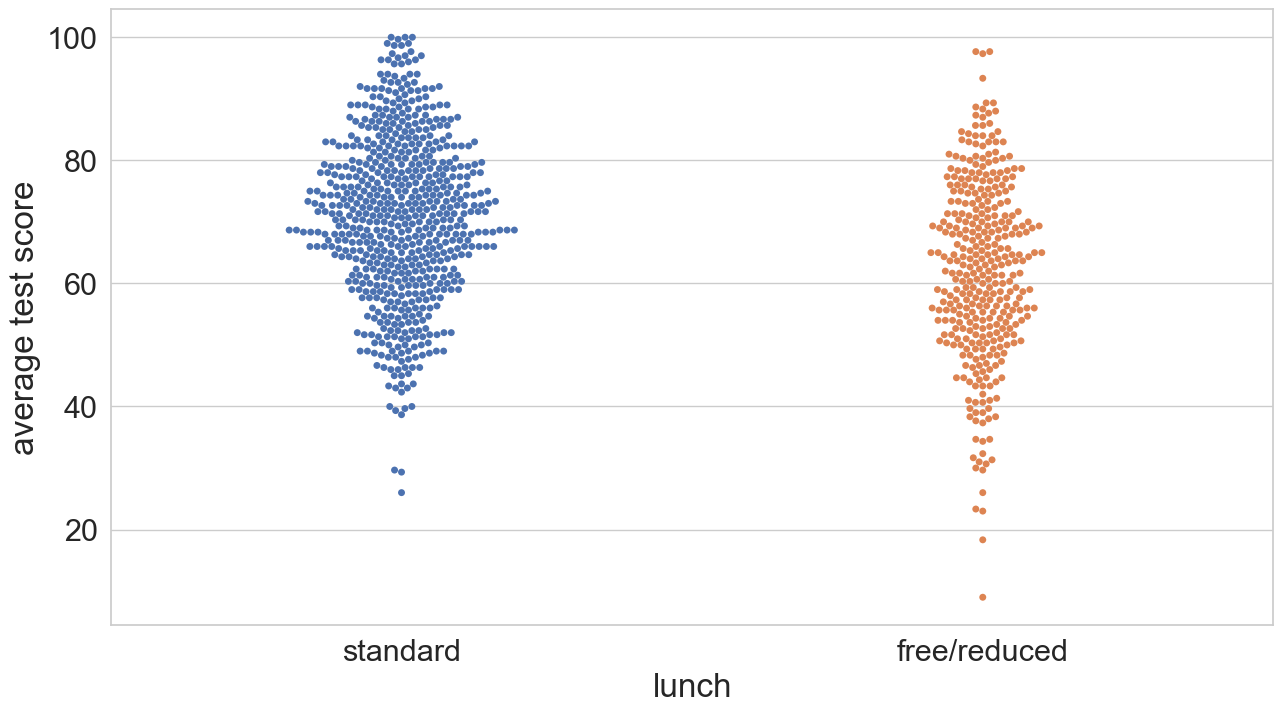

In [21]:
plt.figure(figsize = (15,8))
ax = sns.swarmplot(x = 'lunch', y = 'average test score',data = df5)
ax.set_xticklabels(ax.get_xticklabels())

## 2.3.2 - Describing the Visualization 

- The above visualization known as a swarmplot, shows all the different average test scores for all the individuals within the dataset. It has split these test scores between two categorical variables of "standard" and "free/reduced". The thick sections of the swarmplots represent the mean by showing that alot of the datapoints are centred around a particular test score, and the tails of the of the swarmplot represent the spread of the datapoints.



## 2.3.3 - Answering the research question  

- As can be seen from the visualization,most of the average test scores for students that  paid their way(standard) are centred around the value of  70.837209;and for those that requested a subsidy/bursary(free/reduced), the test scores are centred around 62.199061. This shows that socio-economic status impacts test scores by enabling those who are more financially well off(standard) to be able to get higher test scores than those who are not(free/reduced).The spread of the data also shows that those that requested a subsidy/bursary, have lower minimum and maximum test score values compared to those that paid their way. Further indicating that children's grades are impacted by socio-economic status. This may be because those that paid their way most likely have more money and therefore can afford things like tutors, better schools, or better quality books. While those that took subsidy/bursary cannot do the same things and may have to take up multiple jobs to help cover costs and lose out on more time to learn compared to the other group.